# Air Pollution Dataset

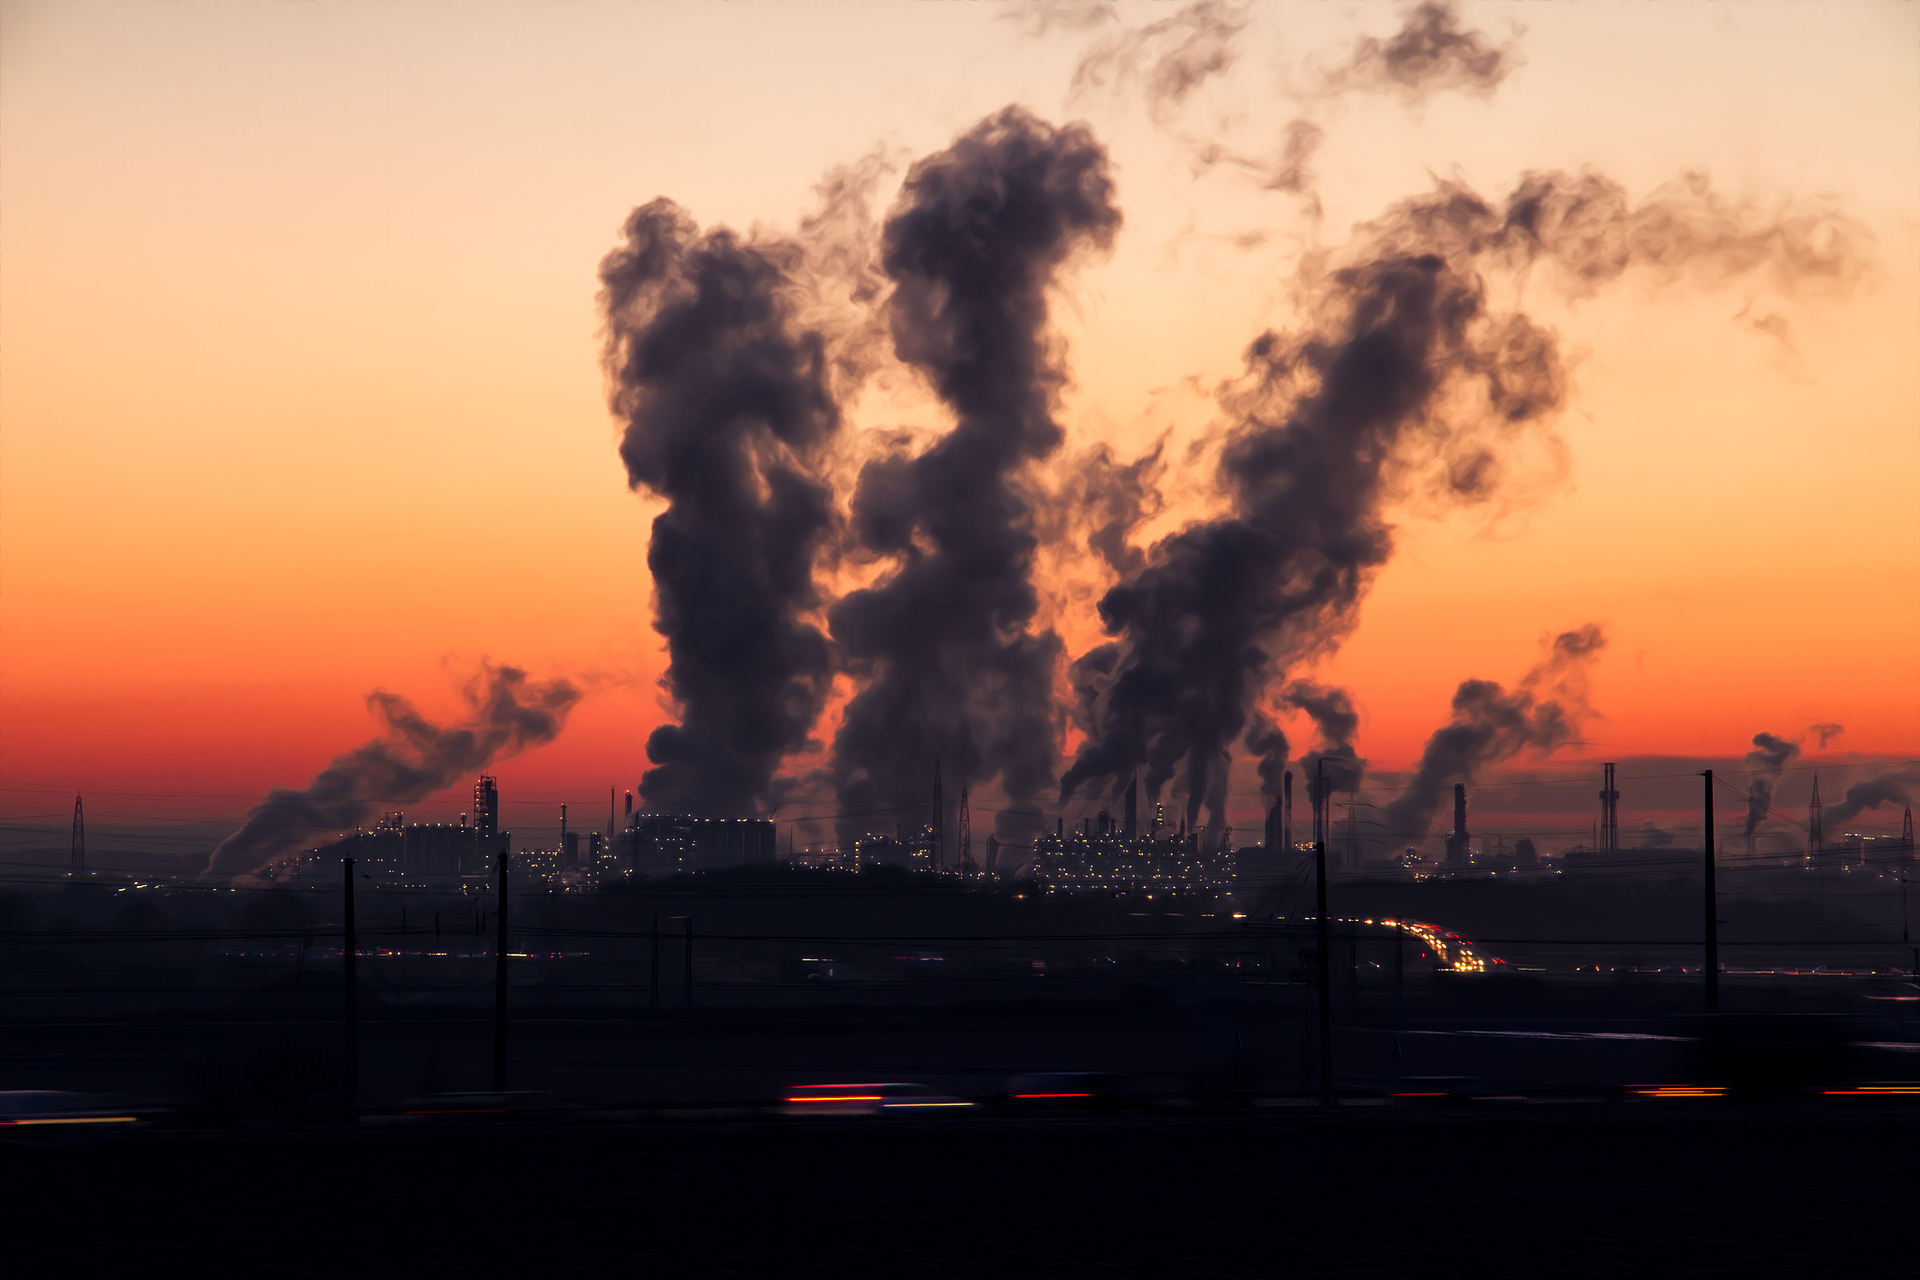

In [1]:
# For Data Analysis and Mathamatical Function usingd the below Lib:-
import numpy as np 
import pandas as pd

#Data Visualization of Missing value using the below lib:-
import missingno as mn

#Data Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the datetime
from datetime import datetime

#for Normalizing and standardization of the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#for spliting the data using the below lib
from sklearn.model_selection import train_test_split

#Machine Learning models Libraries: 
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
air = pd.read_csv(r"C:\Users\EXPERT\Desktop\Ineubytes Internship\Air Pollution dataset\PRSA_data_2010.1.1-2014.12.31.csv")
df=air.copy()
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## Basic EDA 

In [3]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


#### Insight's:
* The dataset has an Index inbuilt but we dont need so we will be Dropping it

In [5]:
df.drop("No",axis=1,inplace=True)

In [6]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [7]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [8]:

# rename the features to a more readable feature names
df = df.rename(columns={
                        'year'     : "Year",
                        'month'    : "Month",
                        'day'      : "Day",
                        'hour'     : "Hour",
                        'pm2.5'    : 'Particulate_Matter',
                        'DEWP'     : 'Dew_Point',
                        'PRES'     : 'ATM_Pressure',
                        'cbwd'     : 'Wind_Dir',
                        'Iws'      : 'Wind_Speed',
                        'Is'       : 'Snowfall',
                        'Ir'       : 'Rain'
                        })

In [9]:
df.describe(include="all")

,Year,Month,Day,Hour,Particulate_Matter,Dew_Point,TEMP,ATM_Pressure,Wind_Dir,Wind_Speed,Snowfall,Rain
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824,43824.000000,43824.000000,43824.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15290,NaN,NaN,NaN
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,NaN,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,NaN,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,NaN,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,NaN,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,NaN,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,NaN,21.910000,0.000000,0.000000


## Handling the missing value

<Axes: >

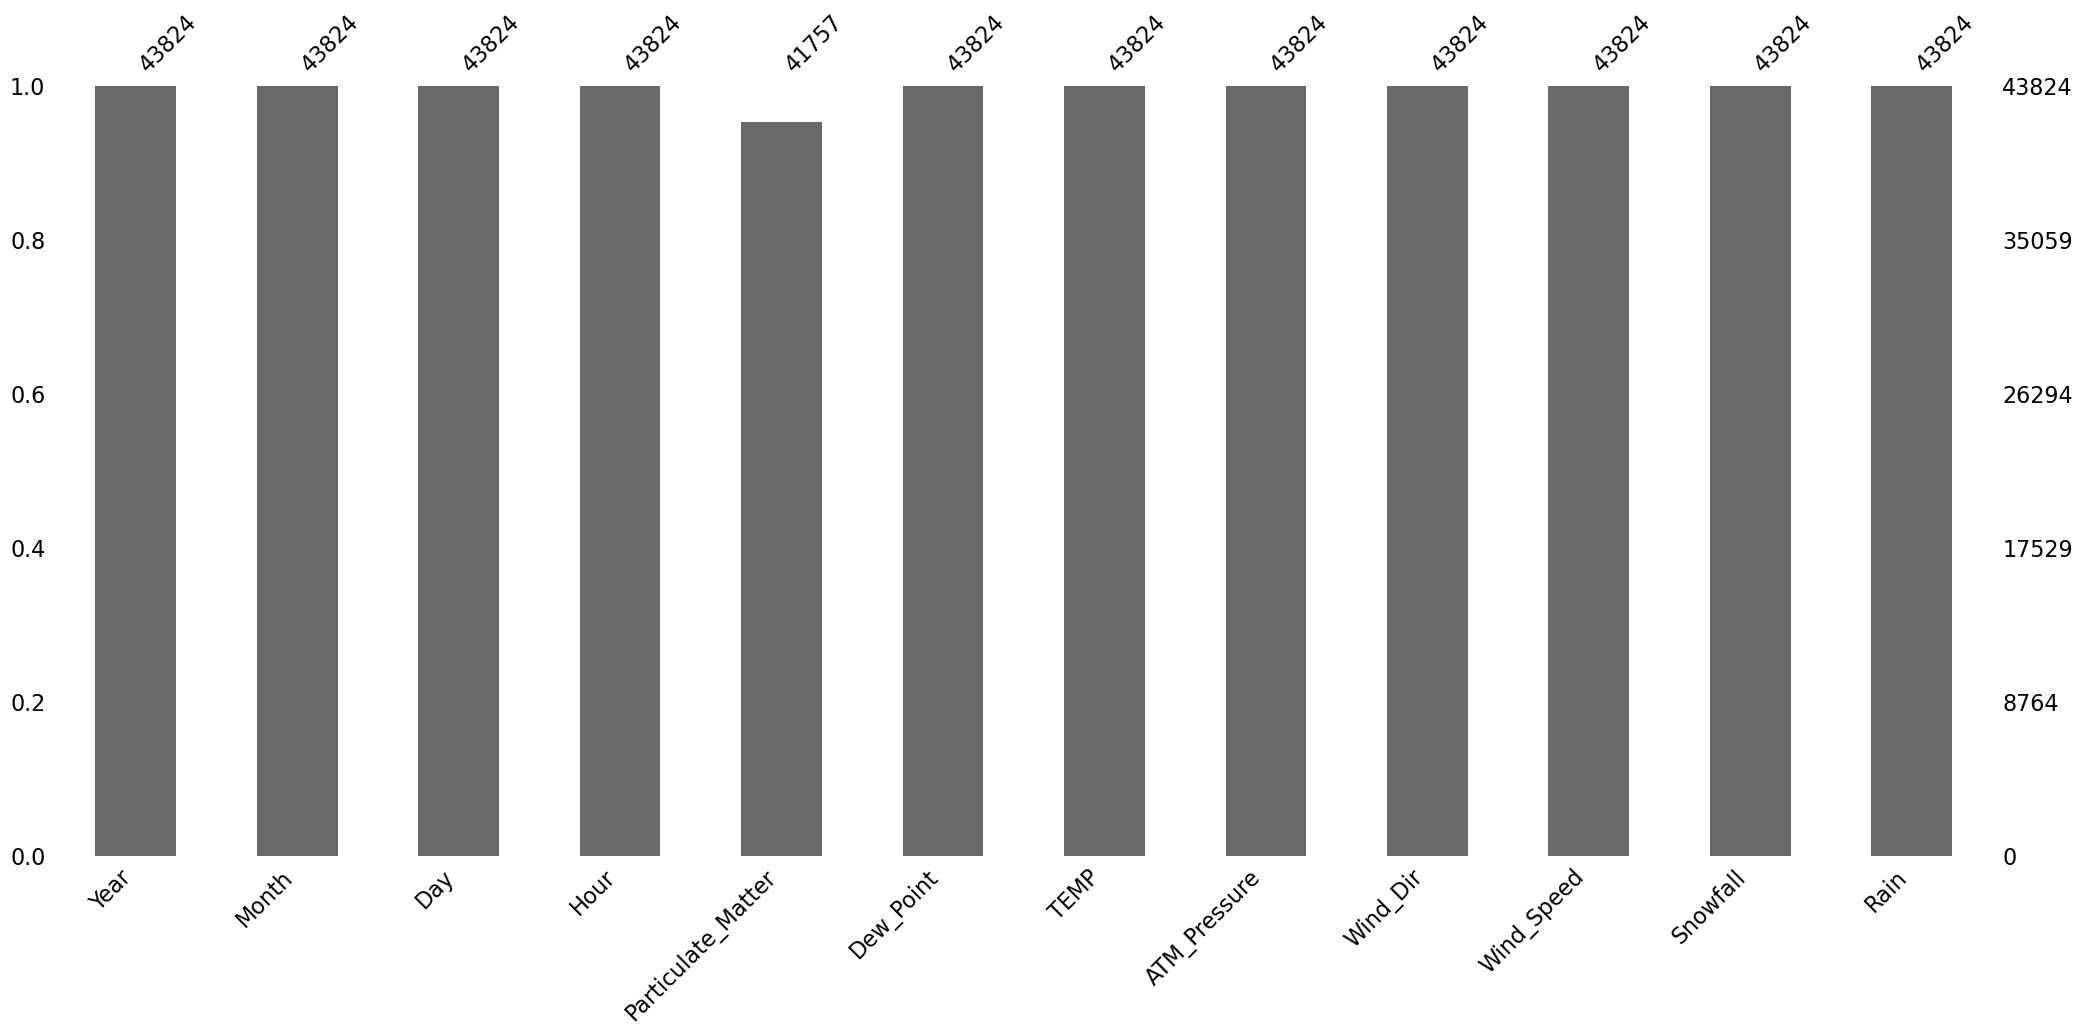

In [10]:
mn.bar(df)

In [11]:
df['Particulate_Matter'].fillna(df[ "Particulate_Matter"].mean(),inplace=True)

In [12]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Particulate_Matter    0
Dew_Point             0
TEMP                  0
ATM_Pressure          0
Wind_Dir              0
Wind_Speed            0
Snowfall              0
Rain                  0
dtype: int64

## Rearranging the Columns

In [13]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Particulate_Matter', 'Dew_Point',
       'TEMP', 'ATM_Pressure', 'Wind_Dir', 'Wind_Speed', 'Snowfall', 'Rain'],
      dtype='object')

In [14]:
df= df[['Year', 'Month', 'Day', 'Hour', 'Dew_Point', 'TEMP', 'ATM_Pressure', 'Wind_Dir',
       'Wind_Speed', 'Snowfall', 'Rain', 'Particulate_Matter']]

## Encoding Categorical Values:

In [15]:
# Encoding categorical variable
cat_values=[]
cont_values=[]
for columns in df.columns:
    if df[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

In [16]:
cat_values

['Year', 'Wind_Dir']

In [17]:
cont_values

['Month',
 'Day',
 'Hour',
 'Dew_Point',
 'TEMP',
 'ATM_Pressure',
 'Wind_Speed',
 'Snowfall',
 'Rain',
 'Particulate_Matter']

In [18]:
df["Wind_Dir"].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [19]:
df1=pd.get_dummies(df,columns=cat_values,drop_first=True)

In [20]:
df1

,Month,Day,Hour,Dew_Point,TEMP,ATM_Pressure,Wind_Speed,Snowfall,Rain,Particulate_Matter,Year_2011,Year_2012,Year_2013,Year_2014,Wind_Dir_NW,Wind_Dir_SE,Wind_Dir_cv
0,1,1,0,-21,-11.0,1021.0,1.79,0,0,98.613215,False,False,False,False,True,False,False
1,1,1,1,-21,-12.0,1020.0,4.92,0,0,98.613215,False,False,False,False,True,False,False
2,1,1,2,-21,-11.0,1019.0,6.71,0,0,98.613215,False,False,False,False,True,False,False
3,1,1,3,-21,-14.0,1019.0,9.84,0,0,98.613215,False,False,False,False,True,False,False
4,1,1,4,-20,-12.0,1018.0,12.97,0,0,98.613215,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,12,31,19,-23,-2.0,1034.0,231.97,0,0,8.000000,False,False,False,True,True,False,False
43820,12,31,20,-22,-3.0,1034.0,237.78,0,0,10.000000,False,False,False,True,True,False,False
43821,12,31,21,-22,-3.0,1034.0,242.70,0,0,10.000000,False,False,False,True,True,False,False
43822,12,31,22,-22,-4.0,1034.0,246.72,0,0,8.000000,False,False,False,True,True,False,False


### Scaling the Numerical Values:

In [21]:
cont_values

['Month',
 'Day',
 'Hour',
 'Dew_Point',
 'TEMP',
 'ATM_Pressure',
 'Wind_Speed',
 'Snowfall',
 'Rain',
 'Particulate_Matter']

In [22]:
cont_values = cont_values[1:8]
cont_values

['Day', 'Hour', 'Dew_Point', 'TEMP', 'ATM_Pressure', 'Wind_Speed', 'Snowfall']

In [23]:
# scaling numerical variables
ss=StandardScaler()
df1[cont_values]=ss.fit_transform(df1[cont_values])

In [24]:
df1

,Month,Day,Hour,Dew_Point,TEMP,ATM_Pressure,Wind_Speed,Snowfall,Rain,Particulate_Matter,Year_2011,Year_2012,Year_2013,Year_2014,Wind_Dir_NW,Wind_Dir_SE,Wind_Dir_cv
0,1,-1.673744,-1.661325,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,0,98.613215,False,False,False,False,True,False,False
1,1,-1.673744,-1.516862,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,0,98.613215,False,False,False,False,True,False,False
2,1,-1.673744,-1.372399,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,0,98.613215,False,False,False,False,True,False,False
3,1,-1.673744,-1.227936,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,0,98.613215,False,False,False,False,True,False,False
4,1,-1.673744,-1.083473,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,0,98.613215,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,12,1.735608,1.083473,-1.719447,-1.184453,1.709325,4.160780,-0.069353,0,8.000000,False,False,False,True,True,False,False
43820,12,1.735608,1.227936,-1.650162,-1.266431,1.709325,4.276956,-0.069353,0,10.000000,False,False,False,True,True,False,False
43821,12,1.735608,1.372399,-1.650162,-1.266431,1.709325,4.375337,-0.069353,0,10.000000,False,False,False,True,True,False,False
43822,12,1.735608,1.516862,-1.650162,-1.348408,1.709325,4.455720,-0.069353,0,8.000000,False,False,False,True,True,False,False


### EDA

<Axes: xlabel='Particulate_Matter', ylabel='count'>

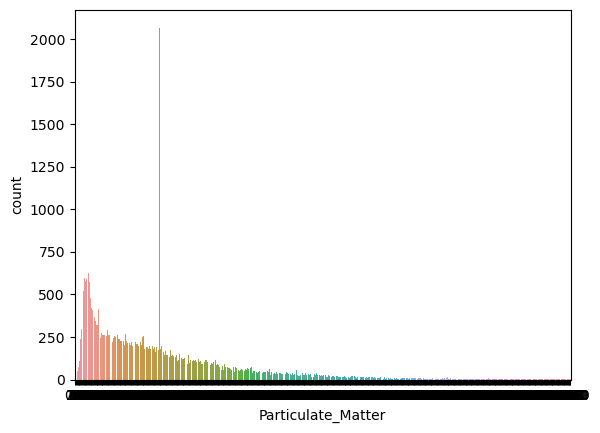

In [25]:
sns.countplot(x=df["Particulate_Matter"],data=df)

<Axes: xlabel='Wind_Dir', ylabel='Count'>

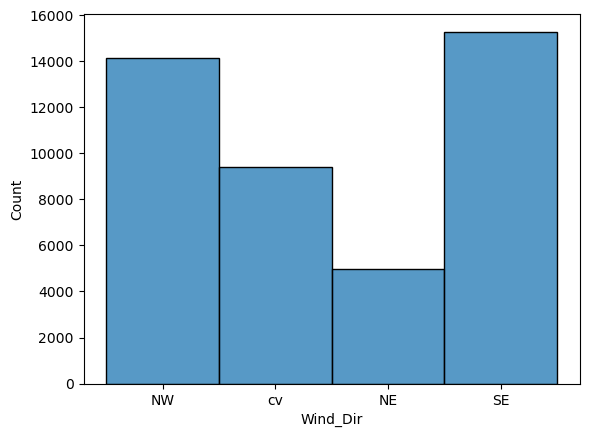

In [26]:
sns.histplot(data=df["Wind_Dir"])

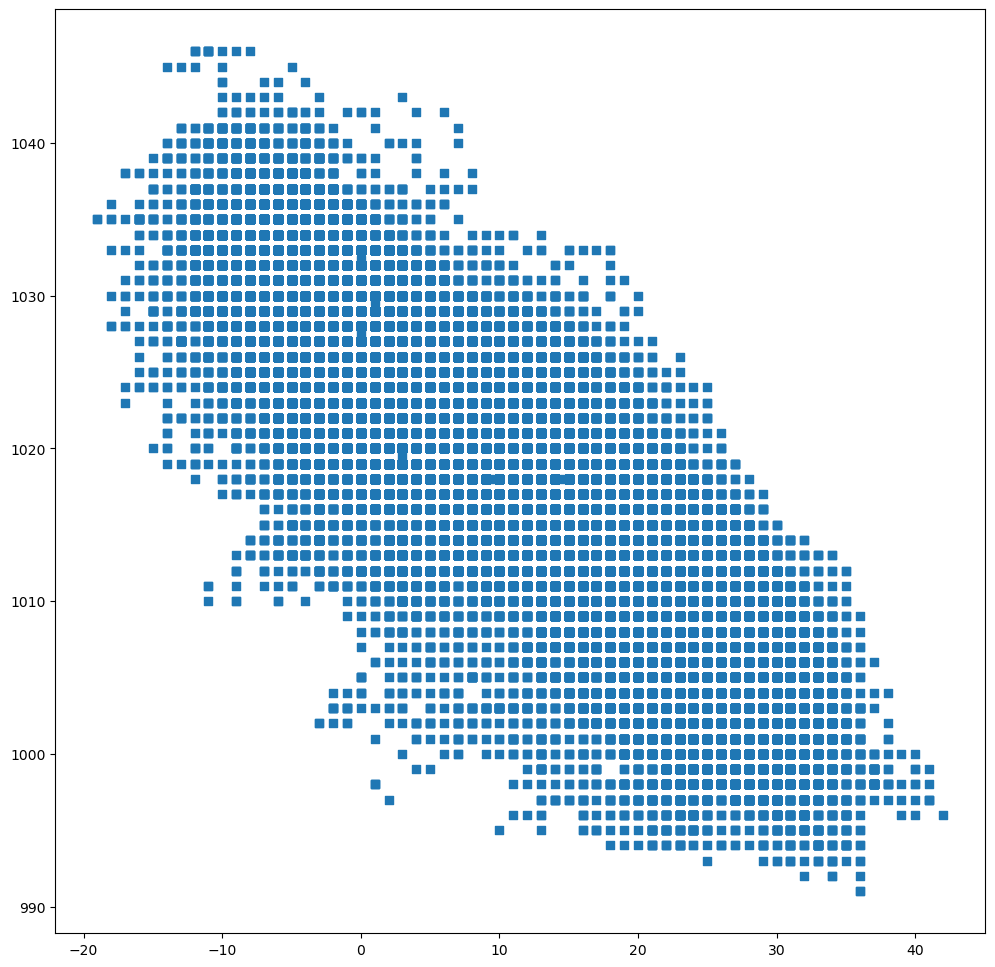

In [27]:
plt.figure(figsize=(12,12))
plt.scatter(x=df['TEMP'],y=df['ATM_Pressure'],marker='s')

In [28]:
df

,Year,Month,Day,Hour,Dew_Point,TEMP,ATM_Pressure,Wind_Dir,Wind_Speed,Snowfall,Rain,Particulate_Matter
0,2010,1,1,0,-21,-11.0,1021.0,NW,1.79,0,0,98.613215
1,2010,1,1,1,-21,-12.0,1020.0,NW,4.92,0,0,98.613215
2,2010,1,1,2,-21,-11.0,1019.0,NW,6.71,0,0,98.613215
3,2010,1,1,3,-21,-14.0,1019.0,NW,9.84,0,0,98.613215
4,2010,1,1,4,-20,-12.0,1018.0,NW,12.97,0,0,98.613215
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,-23,-2.0,1034.0,NW,231.97,0,0,8.000000
43820,2014,12,31,20,-22,-3.0,1034.0,NW,237.78,0,0,10.000000
43821,2014,12,31,21,-22,-3.0,1034.0,NW,242.70,0,0,10.000000
43822,2014,12,31,22,-22,-4.0,1034.0,NW,246.72,0,0,8.000000


## Model Implementation

In [29]:
X = df1.drop("Particulate_Matter",axis=1)
Y = df1["Particulate_Matter"]

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print("*"*10)
print(Y_train.shape)
print(Y_test.shape)

(35059, 16)
(8765, 16)
**********
(35059,)
(8765,)


# Ridge Regressor

In [32]:
RR = Ridge(alpha=0.1)
RR.fit(X_train,Y_train)
predicted_train_RR = (RR.predict(X_train))
predicted_test_RR = (RR.predict(X_test))

In [33]:
regressor=RandomForestRegressor(random_state=0,
                                n_estimators=100,
                                max_depth=5,
                                min_samples_split=4,
                                bootstrap=True)
regressor.fit(X_train,Y_train)
predicted_train_regressor=(regressor.predict(X_train))
predicted_test_regressor=(regressor.predict(X_test))

### Model Evaluation

#### Ridge Regressor

In [34]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_RR))
print(" Mean squared error  :    ",mean_squared_error(Y_train,predicted_train_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_RR)))

 Training DataSet 
 Mean absolute error :     55.481823850370404
 Mean squared error  :     5901.229386003147
 Root mean squared error:  76.81945968309817


In [35]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_RR))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_RR)))

 Testing DataSet 
 Mean absolute error :     55.69542054653434
 Mean squared error :      6006.640324325246
 Root mean squared error:  77.50251818054203


#### Random Forest Regressor

In [36]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_train,predicted_train_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_regressor)))

 Training DataSet 
 Mean absolute error :     50.5931927365241
 Mean squared error :      5037.827495577051
 Root mean squared error:  70.97765490333596


In [37]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_regressor)))

 Testing DataSet 
 Mean absolute error :     50.796408604171496
 Mean squared error :      5105.699254473487
 Root mean squared error:  71.4541759064751


# Overfitting and Cross Validation

In [38]:
print(" Accuracy on training data set")
print(" Accuracy on Ridge Regressor training data set :         ",RR.score(X_train,Y_train))
print(" Accuracy on Random Forest Regressor training data set : ",regressor.score(X_train,Y_train))
acc_rr_train  = RR.score(X_train,Y_train)
acc_rfr_train =regressor.score(X_train,Y_train)

 Accuracy on training data set
 Accuracy on Ridge Regressor training data set :          0.2660221132359424
 Accuracy on Random Forest Regressor training data set :  0.37340954956677286


In [39]:
print(" Accuracy on test data set")
print(" Accuracy on Ridge Regressor test data set :         ",RR.score(X_test,Y_test))
print(" Accuracy on Random Forest Regressor test data set : ",regressor.score(X_test,Y_test))
acc_rr_test=RR.score(X_test,Y_test)
acc_rfr_test=regressor.score(X_test,Y_test)

 Accuracy on test data set
 Accuracy on Ridge Regressor test data set :          0.26802198716588943
 Accuracy on Random Forest Regressor test data set :  0.377811989294044


In [40]:
if acc_rr_train > acc_rr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS OVERFITTED


In [41]:
if acc_rfr_train > acc_rfr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS OVERFITTED


### Conclusion
In conculsion, our data analysis journy has been a fasscinating exeperience. We've exlpored an air polution dataset and applied varoius datascience techniques using Pyhton, NumPy, and Pandas. This was a step towrads enhacing our skillset in the field of datascience.

Throughout the anaylsis, we've encountered challenges such as mising values, data visulization, and model implemntation. We've utilized libraies like matplotlib and searborn for visulizing the data and implemented machin learnig models includng Ridge Regresor and Random Forest Regresor to predict partculate matter levels.

While it's been an exciitng journey, we've learned the importnce of data cleaing, feature enginerring, and model evauluation. The Random Forest Regresor showd promise in predicting air quality, but furhter optmization is needed to reduce overfitting.

In our concludsion, we're garteful for the opprtunity to apply our datascience skils and look forward to contnuing our exploratoin in this ever-evolving field. It is impornt to continously imprss our peers and audience with our insigts and anaylsis.

At the end of the day, datascience is abuot mkaing sense of data and harnssing its power to make informed decisons. We're ecxited to shre our findngs and inpire others in their own datascience journies.